CityList:  [(0,15), (14,16), (15,2), (7,17), (1,14)]
Initial population:  [[0, 4, 3, 1, 2], [2, 0, 1, 4, 3], [1, 3, 2, 0, 4], [4, 3, 1, 0, 2], [1, 4, 3, 0, 2], [4, 0, 1, 3, 2], [3, 0, 2, 1, 4], [0, 4, 3, 1, 2], [0, 3, 4, 2, 1], [0, 4, 3, 1, 2], [2, 1, 0, 3, 4], [3, 4, 2, 0, 1], [1, 3, 4, 2, 0], [3, 1, 0, 4, 2], [1, 2, 0, 4, 3], [4, 3, 0, 1, 2], [1, 3, 4, 0, 2], [1, 0, 4, 3, 2], [2, 0, 4, 3, 1], [2, 4, 3, 1, 0]]
--------Generation  0 -----------

Fittest Individual:  29.80106011113729

Fittest route:  [4, 1, 0, 3, 2]
--------Generation  1 -----------

Fittest Individual:  29.801060111137282

Fittest route:  [3, 1, 0, 4, 2]
--------Generation  2 -----------

Fittest Individual:  29.801060111137282

Fittest route:  [3, 1, 0, 4, 2]
--------Generation  3 -----------

Fittest Individual:  29.801060111137282

Fittest route:  [3, 1, 0, 4, 2]
--------Generation  4 -----------

Fittest Individual:  29.801060111137282

Fittest route:  [4, 1, 0, 3, 2]
--------Generation  5 -----------

Fittest Ind

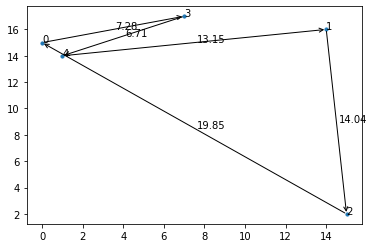

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.text import OffsetFrom


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis**2) + (yDis**2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


class Route:  # Chromosome
    def __init__(self, cityList):
        self.cityList = cityList
        self.route = self.createRoute()
        self.distance = self.routeDistance()
        self.fitness = self.routeFitness()

    def createRoute(self):
        route = random.sample(self.cityList, len(self.cityList))
        return route

    def routeDistance(self):
        pathDistance = 0
        for i in range(0, len(self.route)-1):
            fromCity = self.route[i]
            toCity = None
            if i + 1 < len(self.route):
                toCity = self.route[i + 1]
            else:
                toCity = self.route[0]
            pathDistance += fromCity.distance(toCity)
        return pathDistance

    # Fitness function = inverse of path distance i.e. maximize fitness=> minimum path length
    def routeFitness(self):
        fitness = 1 / float(self.distance)
        return fitness


class Population:
    def __init__(self, popSize, cityList):
        self.popSize = popSize
        self.cityList = cityList
        self.routes, self.fitness = self.initialPopulation()

    def initialPopulation(self):
        population = []
        fitness = []
        for i in range(0, self.popSize):
            r = Route(self.cityList)
            population.append(r.route)
            fitness.append(r.routeFitness())
        return population, fitness


class GA:
    def __init__(self, popSize, cityList, tournament_size=3, pc=0.65, pm=0.1):
        self.tournament_size = tournament_size
        self.population = Population(popSize, cityList)
        self.pc = pc  # crossover probability
        self.pm = pm  # mutation probabaility
        self.fittest = 0
        self.fittest_route = 0
        self.parents = 0
        self.offspring = 0

    def selection(self):
        # Performs tournament selection without replacement of size s
        parents = []
        while len(parents) != self.population.popSize:
            participants = random.sample(
                self.population.fitness, self.tournament_size)
            # get index of fittest participant
            index = self.population.fitness.index(max(participants))

            # add fittest participant to parent list for reproduction
            parents.append(self.population.routes[index])
        # print("Parents:",index_routes(parents,cityList))
        self.parents = parents

    def crossover(self):
        # Performs order crossover with probability pc
        offspring = []
        # select parents by randomly generating indices
        while len(self.parents) != 0:
            # select mate for gene at position 0 by randomly generating index in range [1,len(parents)-1]
            index = random.randint(1, len(self.parents)-1)
            #print("Index: ",index)
            A = self.parents[0]
            #print("A:,",[cityList.index(city) for city in A])
            B = self.parents[index]
            #print("B:,",[cityList.index(city) for city in B])

            # generate random probability in range [0,1]
            pc = random.uniform(0, 1)

            # check against crossover probability
            if pc <= self.pc:
                # perform crossover
                # generate random crossover point
                crossover_index = random.randint(
                    0, len(cityList)-3)  # window size = 3 cities = 10
                #print("Crossover_index: ",crossover_index)

                # extract cities in selected window
                window_A = A[crossover_index:crossover_index+3]
                window_B = B[crossover_index:crossover_index+3]
                #print("Window A:",[cityList.index(city) for city in window_A])
                #print("Window B:",[cityList.index(city) for city in window_B])
                C = []
                D = []
                i = 0
                j = 0
                # Fill until crossover_index
                while len(C) != crossover_index:
                    if B[i] not in window_A:
                        C.append(B[i])
                    i = i+1
                while len(D) != crossover_index:
                    if A[j] not in window_B:
                        D.append(A[j])
                    j = j+1

                # Append windows
                C = C + window_A
                D = D + window_B

                # Fill remaining positions
                while len(C) != len(cityList):
                    if B[i] not in window_A:
                        C.append(B[i])
                    i = i+1
                while len(D) != len(cityList):
                    if A[j] not in window_B:
                        D.append(A[j])
                    j = j+1

                # Append to offspring
                offspring.append(C)
                offspring.append(D)
            else:
                # no crossover
                offspring.append(A)
                offspring.append(B)

            # remove selected parents from parents array
            self.parents.pop(index)
            self.parents.pop(0)

        self.offspring = offspring
        #print('\nOffspring: ',index_routes(self.offspring,cityList))

    def mutation(self):
        # Swap mutation is performed with probability pm

        for x in range(len(self.offspring)):
            # Generate mutation probability randomly
            pm = random.uniform(0, 1)
            if pm <= self.pm:
                # mutation occurs
                indexes = [random.randint(0, len(cityList)-1)
                           for i in range(2)]

                route = self.offspring[x]
                #print("Route: ",route)
                city = route[indexes[0]]
                route[indexes[0]] = route[indexes[1]]
                route[indexes[1]] = city
                #print("Mutate route: ",route)

                # Replace with mutated gene
                self.offspring[x] = route
                #print("Mutated offspring:",index_routes(self.offspring,cityList))

    def replacement(self):
        self.population.routes = self.offspring
        self.population.fitness = []
        for route in self.population.routes:
            r = Route(cityList)
            r.route = route
            r.routeDistance()
            self.population.fitness.append(r.routeFitness())
        self.fittest = max(self.fittest, max(self.population.fitness))
        if self.fittest in self.population.fitness:
            index = self.population.fitness.index(self.fittest)
            self.fittest_route = self.population.routes[index]
        self.offspring = []

        #print("\nGene pool : ",index_routes(self.population.routes,cityList))
        #print("\nFitness : ",self.population.fitness)
        print("\nFittest Individual: ", 1/self.fittest)
        print("\nFittest route: ", [cityList.index(city)
              for city in self.fittest_route])


def index_routes(routes, cityList):
    return [[cityList.index(city) for city in route] for route in routes]


# Main
popSize = 20
n_generations = 10
cityList = []
for i in range(0, 5):
    cityList.append(City(x=int(random.random() * 25),
                    y=int(random.random() * 25)))
print("CityList: ", cityList)
ga = GA(popSize, cityList)
print("Initial population: ", index_routes(ga.population.routes, cityList))
for i in range(n_generations):
    print("--------Generation ", i, "-----------")
    ga.selection()
    ga.crossover()
    ga.mutation()
    ga.replacement()

X = [cityList[i].x for i in range(len(cityList))]
y = [cityList[i].y for i in range(len(cityList))]

fig, ax = plt.subplots()
ax.scatter(X, y, s=10)
for i in range(len(cityList)):
    ax.annotate(i, (X[i], y[i]))


def connectpoints(route, p1, p2, cost):
    x1, x2 = route[p1].x, route[p2].x
    y1, y2 = route[p1].y, route[p2].y
    xmid = (x1+x2)/2
    ymid = (y1+y2)/2
    # ax.plot([x1,x2],[y1,y2])
    c = "{:.2f}".format(cost)
    an1 = ax.annotate('', xy=(x1, y1), xycoords='data', xytext=(x2, y2), textcoords='data',
                      arrowprops=dict(arrowstyle="<-", connectionstyle="arc3"),)
    offset_from = OffsetFrom(an1, (0, 0))
    an2 = ax.annotate(c, (xmid+0.1, ymid))

    # plt.setp(line,linewidth=0.5)
cost = []
for i in range(len(ga.fittest_route)-1):
    x1, y1 = ga.fittest_route[i].x, ga.fittest_route[i].y
    x2, y2 = ga.fittest_route[i+1].x, ga.fittest_route[i+1].y
    cost.append(City(x1, y1).distance(City(x2, y2)))
cost.append(City(ga.fittest_route[0].x, ga.fittest_route[0].y).distance(City(
    ga.fittest_route[len(ga.fittest_route)-1].x, ga.fittest_route[len(ga.fittest_route)-1].y)))
for i in range(len(ga.fittest_route)-1):
    connectpoints(ga.fittest_route, i, i+1, cost[i])
connectpoints(ga.fittest_route, len(ga.fittest_route) -
              1, 0, cost[len(ga.fittest_route)-1])
plt.show()
